# Gene Expression PCA

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Boxplots</a></span><ul class="toc-item"><li><span><a href="#Gene-Expression-Boxplots" data-toc-modified-id="Gene-Expression-Boxplots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gene Expression Boxplots</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Scree-Plot" data-toc-modified-id="Scree-Plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Scree Plot</a></span></li><li><span><a href="#Explained-Variance" data-toc-modified-id="Explained-Variance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Explained Variance</a></span></li><li><span><a href="#Cumulative-Explained-Variance" data-toc-modified-id="Cumulative-Explained-Variance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cumulative Explained Variance</a></span></li><li><span><a href="#Principal-Components" data-toc-modified-id="Principal-Components-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Principal Components</a></span></li><li><span><a href="#PC-Boxplot" data-toc-modified-id="PC-Boxplot-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>PC Boxplot</a></span></li></ul></li><li><span><a href="#K-means-Scatter-Plot" data-toc-modified-id="K-means-Scatter-Plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>K-means Scatter Plot</a></span><ul class="toc-item"><li><span><a href="#3D-Scatter-Plot-by-Condition" data-toc-modified-id="3D-Scatter-Plot-by-Condition-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>3D Scatter Plot by Condition</a></span></li><li><span><a href="#K-Means-Clusters" data-toc-modified-id="K-Means-Clusters-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>K-Means Clusters</a></span></li></ul></li></ul></div>

## Introduction
The signaling pathway regulating the activity of the mammalian target of rapamycin complex 1 (mTORC1) controls skeletal muscle homeostasis, which is determined by the difference in the rates of protein synthesis and degradation. In the skeletal muscle, mTORC1 activation occurs in response to a variety of signals, including growth factors, nutrients, energy state and mechanical load. To study the function of mTORC1 in the skeletal muscle, the laboratory of Dr. Markus Rüegg (Biozentrum) has developed a mouse model called TSCmKO, in which the mTORC1 inhibitor Tsc1 was selectively deleted in skeletal muscles. It was found that these mice develop precocious sarcopenia, characterized by fragmentation of the neuromuscular junction, progressive loss of muscle mass and loss of muscle force. Treatment of TSCmKO mice with rapamycin, an mTORC1 inhibitor, ameliorated the myopathy. To identify core pathways that underlie myopathy in TSCmKO mice, mRNA-seq samples from EDL muscle of TSCmKO mice and wild-type mice of the age of 3 months (young phase in both TSCmKO and wild-type mice) and 9 months (adult phase in wild-type mice and sarcopenic phase in TSCmKO mice) in combination with rapamycin treatment were generated and sequenced at the Quantitative Genomics facility of the Biozentrum.

The table called “GeneExpressionTable.tsv” contains the information about the expression of 117 genes in log2[TPM] units measured in the Musculus extensor digitorum longus of the following mice:

- Condition 1: 5 replicates of 3 months old wild-type mice
- Condition 2: 5 replicates of 3 months old wild-type mice treated with rapamycin
- Condition 3: 5 replicates of 3 months old TSCmKO mice
- Condition 4: 5 replicates of 3 months old TSCmKO mice treated with rapamycin
- Condition 5: 5 replicates of 9 months old wild-type mice
- Condition 6: 5 replicates of 9 months old wild-type mice treated with rapamycin
- Condition 7: 5 replicates of 9 months old TSCmKO mice
- Condition 8: 5 replicates of 9 months old TSCmKO mice treated with rapamycin

## Imports

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.mplot3d import axes3d, Axes3D
import scipy.io
import pandas as pd
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import cluster, datasets
import ipywidgets as widgets
from IPython.display import display
from collections import OrderedDict
%matplotlib inline

## Boxplots

### Gene Expression Boxplots
Create boxplots for the expression of genes “gene_3”, “gene_45”, “gene_79” and “gene_86” in mentioned
conditions and characterize the expression of these genes. 

In [5]:
#Choose Genes to plot
genes_to_plot = [3,45,79,86]

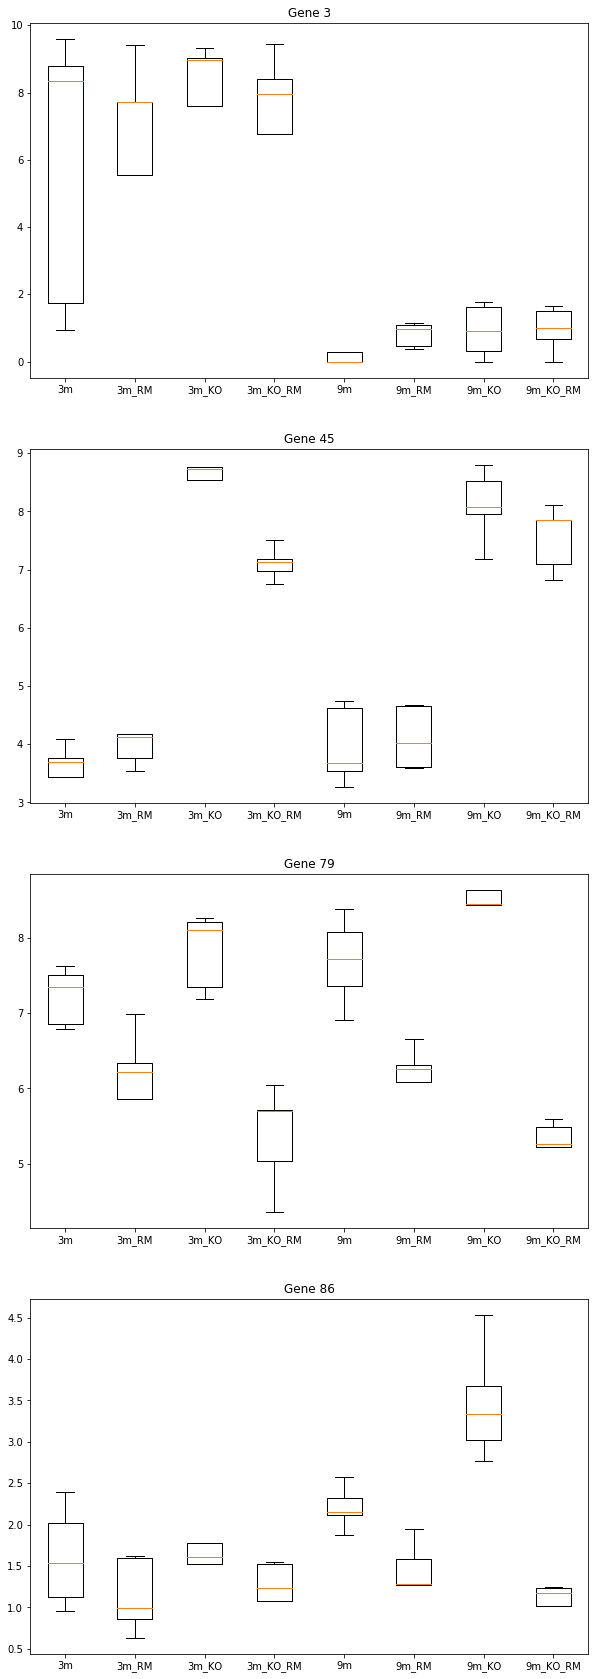

In [6]:
# Read data and set basic variables
gene_df = pd.read_csv('GeneExpressionTable.tsv', sep='\t')
data_dict = {}
data_mean = {}
data_spread = {}
cond_list = ['3m', '3m_RM', '3m_KO', '3m_KO_RM',
             '9m', '9m_RM', '9m_KO', '9m_KO_RM']

conditions = [['3m_rep1', '3m_rep5'],
              ['3m_RM_rep1', '3m_RM_rep5'],
              ['3m_KO_rep1', '3m_KO_rep5'],
              ['3m_KO_RM_rep1', '3m_KO_RM_rep5'],
              ['9m_rep1', '9m_rep5'],
              ['9m_RM_rep1', '9m_RM_rep5'],
              ['9m_KO_rep1', '9m_KO_rep5'],
              ['9m_KO_RM_rep1', '9m_KO_RM_rep5']]

for i in genes_to_plot:
    for cond in conditions:
        data_dict["gene_"+str(i)+'_'+str(cond[0][:-5])
                  ] = gene_df.loc[i-1][cond[0]:cond[1]]
        data_mean["gene_"+str(i)+'_'+str(cond[0][:-5])
                  ] = np.mean(gene_df.loc[i-1][cond[0]:cond[1]])
        data_spread["gene_"+str(i)+'_'+str(cond[0][:-5])
                    ] = np.std(gene_df.loc[i-1][cond[0]:cond[1]])

# Initialise Figure
fig = plt.figure(1, figsize=(10, 30))
rows = len(genes_to_plot)
columns = 1

# Initialise Subplots
for i in range(len(genes_to_plot)):
    # 4 rows, 1 column, index
    gene_num = genes_to_plot[i]  # e.g. 3 45 86
    # Subplots with e.g. 4 rows, 1 column, index
    ax = fig.add_subplot(rows, columns, i+1)
    data_to_plot = []

    # Fill data_to_plot array
    for cond in conditions:
        data_to_plot.append(
            # Values in data_dict['gene_'+$gene_number$ + '_' + $condition$']
            data_dict['gene_'+str(gene_num)+'_'+str(cond[0][:-5])])

    # Title: Gene NUMBBER
    ax.set_title('Gene ' + str(gene_num))

    # Display Boxplots
    bx = ax.boxplot(data_to_plot, showfliers=False, labels=cond_list)

**Question:** 


`In which condition/s do these genes have a higher or lower expression?`


**Answer:**


Gene 3 shows a reduced expression for 9 months old specimen compared to 3 months olds over all conditions.

Gene 45 shows an increase in expression for both the knockout and combined treatment.

Gene 79 shows a lower expression for both Rapamycin and combined treatment but a higher expression in the gene knockout.

Gene 86 shows a significant increase in 9 months old KO specimen compared to 3 months baseline.

## PCA
Quantify principal components 1 (PC1), PC2 and PC3
and the percentage of the variance that they explain. 

### Scree Plot

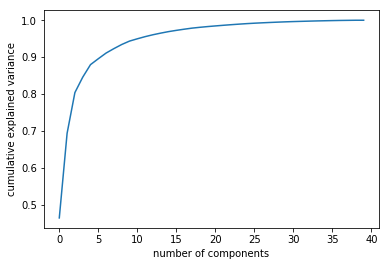

In [7]:
# PCA on Dataset
pca = PCA(n_components=40)
pcat = PCA(n_components=40)
pca_data = gene_df.drop(['gene_id'], axis=1)

pca.fit_transform(pca_data.T)
pcat.fit_transform(pca_data.T)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot()
cumsum = np.cumsum(pcat.explained_variance_ratio_)

# PCA on Dataset with 3 components
pca3t = PCA(n_components=3)
pca3t.fit_transform(pca_data.T)

pca3 = PCA(n_components=3)
pca3.fit_transform(pca_data)


# Cumulative Variance
def f(x):
    return cumsum[x-1]*100

### Explained Variance

In [8]:
# Display Explained Variance for PC1-PC3
pca3t.transform(pca_data.T)
PCs = np.transpose(
    [pca3.components_[0], pca3.components_[1], pca3.components_[2]])
k_PCs = np.transpose(
    [pca3t.components_[0], pca3t.components_[1], pca3t.components_[2]])
print("PCA by Conditions:")
print(pca3.explained_variance_ratio_)

print("PCA by Genes:")
print(pca3t.explained_variance_ratio_)

PCA by Conditions:
[0.73168743 0.12404557 0.06157152]
PCA by Genes:
[0.46406599 0.22934225 0.11050398]


### Cumulative Explained Variance

In [9]:
# Display Slider with Cumulative Explained Variance
print('Cumulative Explained Variance:')
interact(f, x=(1, 40, 1), value=3);

Cumulative Explained Variance:


interactive(children=(IntSlider(value=20, description='x', max=40, min=1), Output()), _dom_classes=('widget-in…

### Principal Components

In [119]:
# Display Principal Components
print(pca3t.components_)

[[-0.19590007 -0.20634107 -0.04732572 -0.16545443 -0.06649532 -0.05920324
  -0.06101624 -0.12033489 -0.13293112 -0.04159629 -0.04955115 -0.05956468
  -0.09875698 -0.11154952 -0.04126172 -0.10060078 -0.03848439 -0.097323
  -0.10038848 -0.04545142 -0.08250682 -0.02992593 -0.05994896 -0.08567958
  -0.0569886   0.1156746   0.12099543  0.1079085   0.09190126  0.08872589
   0.12918427  0.10585226  0.14888075  0.13905172  0.15522587  0.14740613
   0.09396873  0.16824016  0.11631577  0.10304167  0.147049    0.13427131
   0.16238993  0.14912982  0.19099221  0.14394968  0.19153592  0.18115281
   0.1509931   0.36418001  0.0802221   0.05037143 -0.018111   -0.02069415
   0.09262291 -0.02034942  0.07537836  0.10803433 -0.03675524  0.08671116
  -0.06221867  0.00511866 -0.05985064 -0.06686155 -0.0603177  -0.05801372
  -0.08807122 -0.03967883 -0.0791727  -0.03402901  0.00631486 -0.036835
   0.0108616  -0.04977767 -0.0260592   0.00945246 -0.09066175 -0.05316013
   0.02105357 -0.05213832  0.01081778  0.0

### PC Boxplot
For each PC create a boxplot of coordinates split by
conditions. 

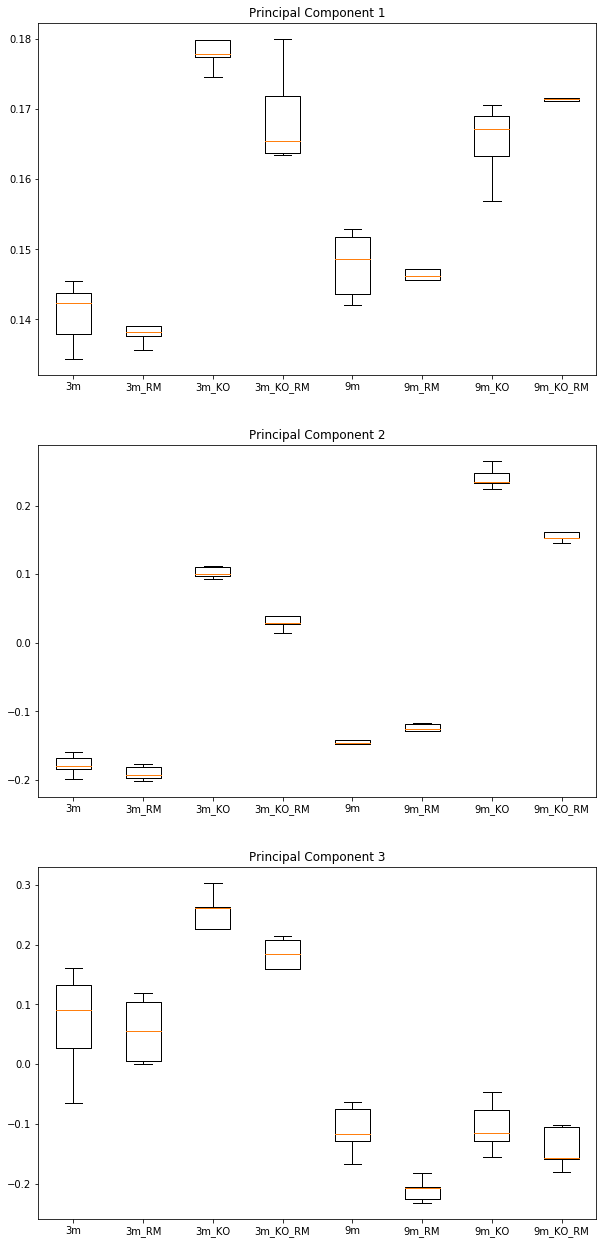

In [10]:
# Initialise Plot
fig = plt.figure(1, figsize=(10, 22))
rows = len(pca3.components_)
columns = 1
for i in range(len(pca3.components_)):
    # Subplot with 3 rows, 1 column, index
    ax = fig.add_subplot(rows, columns, i+1)
    pca_data_to_plot = []

    # Fill Data array
    for cond in range(len(conditions)):
        pca_data_to_plot.append(
            pca3.components_[i][cond*5:cond*5+5])

    # Set dynamic title
    ax.set_title('Principal Component ' + str(i + 1))

    # Display Boxplot
    bx = ax.boxplot(pca_data_to_plot, showfliers=False, labels=cond_list)

**Question:** 


`Which difference in the gene expression between conditions do principal components 1, 2 and 3
reflect?`


**Answer:**

Principal Component 1 and 2 primarily explain the effect size of gene-knockout and combined treatment.

Principal Component 2 also leads to a reduced increase in combined treatment.

Principal Component 3 accounts for most of the age difference in specimen.

## K-means Scatter Plot

### 3D Scatter Plot by Condition
Plot PC1 vs PC2 vs PC3 on the 3-D scatter plot. Color replicates by conditions and label data points with the corresponding replicate names. 

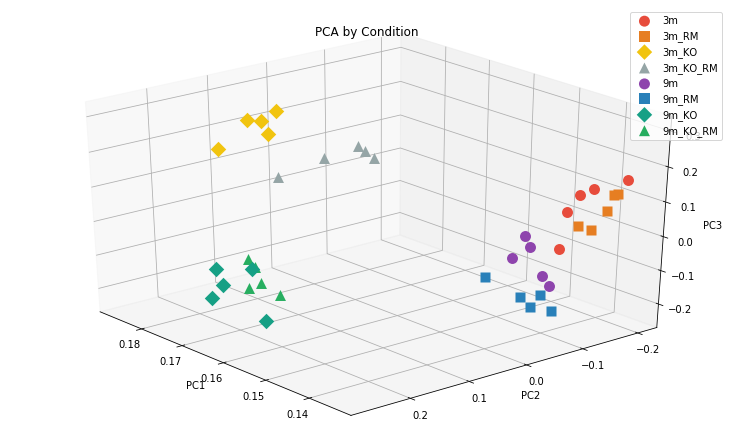

In [12]:
# Prepare Plot
color_map = ('#e74c3c', '#e67e22', '#f1c40f', '#95a5a6',
             '#8e44ad', '#2980b9', '#16a085', '#27ae60')
marker_map = ('o', 's', 'D', '^',  'o', 's', 'D', '^')

colors = []
markers = []
conds = []

# Visuals
for col, mark, con in zip(color_map, marker_map, cond_list):
    index = 0
    while index < 5:
        colors.append(col)
        markers.append(mark)
        conds.append(con)
        index += 1

# Initialise Plot
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)

# Scatter
for data, color, group, marker in zip(PCs, colors, conds, markers):
    x, y, z = data
    ax.scatter(x, y, z, c=color, edgecolors='none',
               marker=marker, s=120, label=group)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA by Condition')

# View Settings
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.view_init(30,140)
plt.show()
a = 0

### K-Means Clusters
Cluster replicates using k-means clustering (determine the number of clusters
from PCA results). Annotate data points on PCA plots with the same color if replicates belong to the same
cluster. 

In [13]:
# Fit Clusters
k_means = cluster.KMeans(n_clusters=6)
k_means.fit(k_PCs)
print(k_means.labels_)
      
# Prepare Plot
k_colors_all = ('#e74c3c', '#e67e22', '#f1c40f', '#27ae60', '#2980b9', '#95a5a6')
k_markers_all = ('o', 's', 'D', '^',  'o', 's', 'D', '^')
k_conds_all = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
k_colors, k_markers, k_conds = [],[],[]

for i in k_means.labels_:
    k_colors.append(k_colors_all[i])
    k_markers.append(k_markers_all[i])
    k_conds.append(k_conds_all[i])


[0 0 3 0 3 3 3 0 0 3 3 3 0 0 3 0 3 0 0 1 5 3 3 0 3 2 1 4 4 4 2 4 2 2 2 2 4
 2 4 4 2 4 2 1 2 4 2 2 4 2 2 5 3 3 5 3 5 2 3 2 0 1 0 0 0 5 0 0 0 0 0 0 0 0
 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


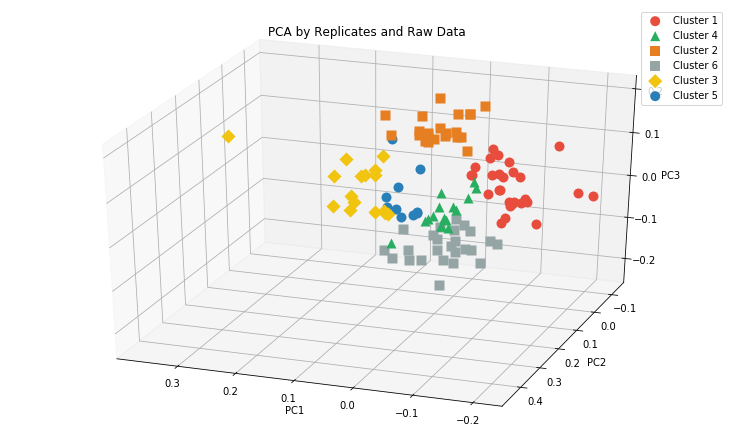

In [19]:
# Initialise
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)

# Scatter
for data, color, group, marker in zip(k_PCs, k_colors, k_conds, k_markers):
    x, y, z = data
    ax.scatter(x, y, z, c=color, edgecolors='none',
               marker=marker, s=100, label=group)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA by Replicates and Raw Data')

# View Settings
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.view_init(30, 110)
plt.show()
b=0

**Question:** 


`Which of replicates have similar gene expression?`


**Answer:**

In [20]:
for i in range(6):
    print('Cluster '+str(i))
    print( [c for c, x in enumerate(k_means.labels_) if x == i] )

Cluster 0
[0, 1, 3, 7, 8, 12, 13, 15, 17, 18, 23, 60, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 89]
Cluster 1
[19, 26, 43, 61, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
Cluster 2
[25, 30, 32, 33, 34, 35, 37, 40, 42, 44, 46, 47, 49, 50, 57, 59]
Cluster 3
[2, 4, 5, 6, 9, 10, 11, 14, 16, 21, 22, 24, 52, 53, 55, 58]
Cluster 4
[27, 28, 29, 31, 36, 38, 39, 41, 45, 48]
Cluster 5
[20, 51, 54, 56, 65, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98]
